# Table of Contents
1. [Introduction](#Introduction)
2. [Primary Data Loading](#Primary-Data-Loading)
3. [Data Cleaning](#Data-Cleaning)
4. [EDA (Exploratory Data Analysis)](#EDA)
5. [Modeling](#Modeling)
6. [Conclusion](#Conclusion)

# Introduction
<a id="Introduction"></a>

In [2]:
import time
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Primary Data Loading
<a id="Primary-Data-Loading"></a>

In [2]:
rental_data_df = pd.read_csv('inputs/RentingOutofFlats2024CSV.csv')

In [3]:
rental_data_df.head()

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450


In [50]:
rental_data_df['address'] = rental_data_df['block'] + ' ' + rental_data_df['street_name'] 

In [4]:
rental_data_df.isna().sum().sum() == 0

True

In [5]:
rental_data_df['DATE']       = pd.to_datetime(rental_data_df['rent_approval_date'], errors = 'coerce')
rental_data_df['YEAR']       = rental_data_df['DATE'].dt.year.astype('str')
rental_data_df['MONTH']      = rental_data_df['DATE'].dt.month.astype('str')
rental_data_df['YEAR_MONTH'] = rental_data_df['YEAR'] + '_' + rental_data_df['MONTH']

In [6]:
rental_data_df.groupby('YEAR').size()

YEAR
2021    38882
2022    33612
2023    36854
2024    33478
dtype: int64

In [7]:
rental_data_df['town'].nunique()

27

In [8]:
rental_data_df.groupby('town').size().sort_values().head()

town
TENGAH              2
BUKIT TIMAH       429
MARINE PARADE    1558
CENTRAL          2165
BISHAN           3166
dtype: int64

In [9]:
rental_data_df.groupby('town').size().sort_values(ascending = False).head()

town
JURONG WEST    9947
TAMPINES       9510
SENGKANG       9282
BEDOK          8497
ANG MO KIO     7868
dtype: int64

In [10]:
rental_data_df.groupby('flat_type').size()

flat_type
1-ROOM          44
2-ROOM        2889
3-ROOM       46576
4-ROOM       51455
5-ROOM       33919
EXECUTIVE     7943
dtype: int64

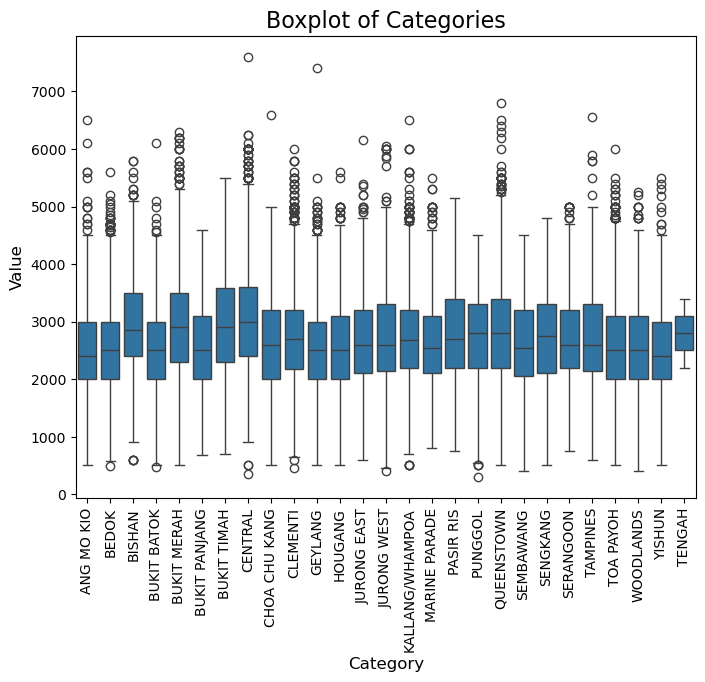

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = rental_data_df['monthly_rent'], x = rental_data_df['town'])
plt.title('Boxplot of Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=90)
plt.show()

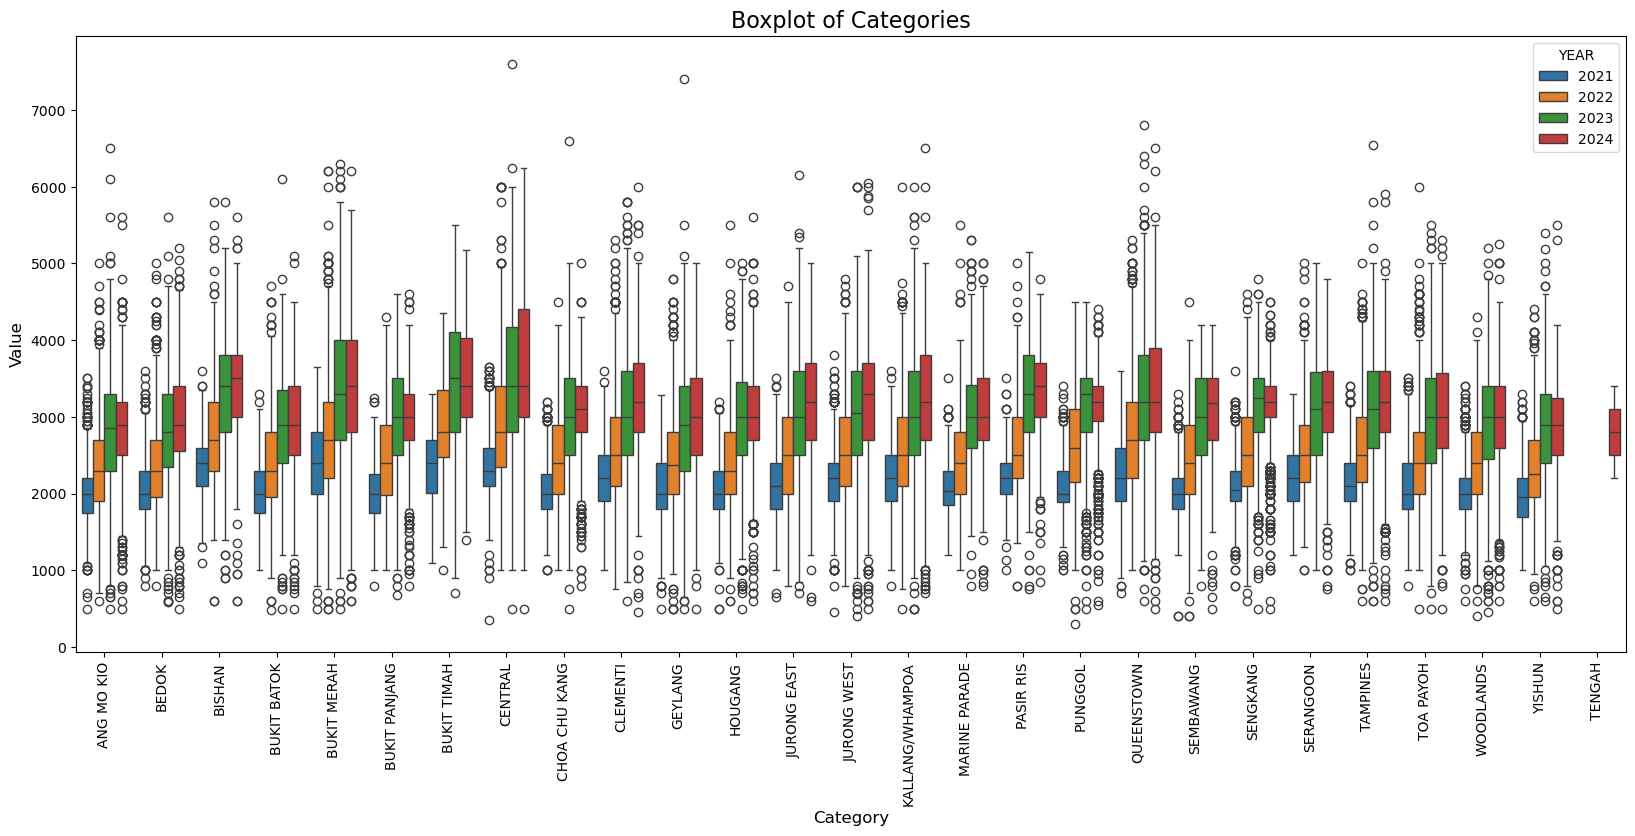

In [12]:
plt.figure(figsize=(20, 8))

sns.boxplot(y = rental_data_df['monthly_rent'], x = rental_data_df['town'], hue = rental_data_df['YEAR'])
plt.title('Boxplot of Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=90)
plt.show()

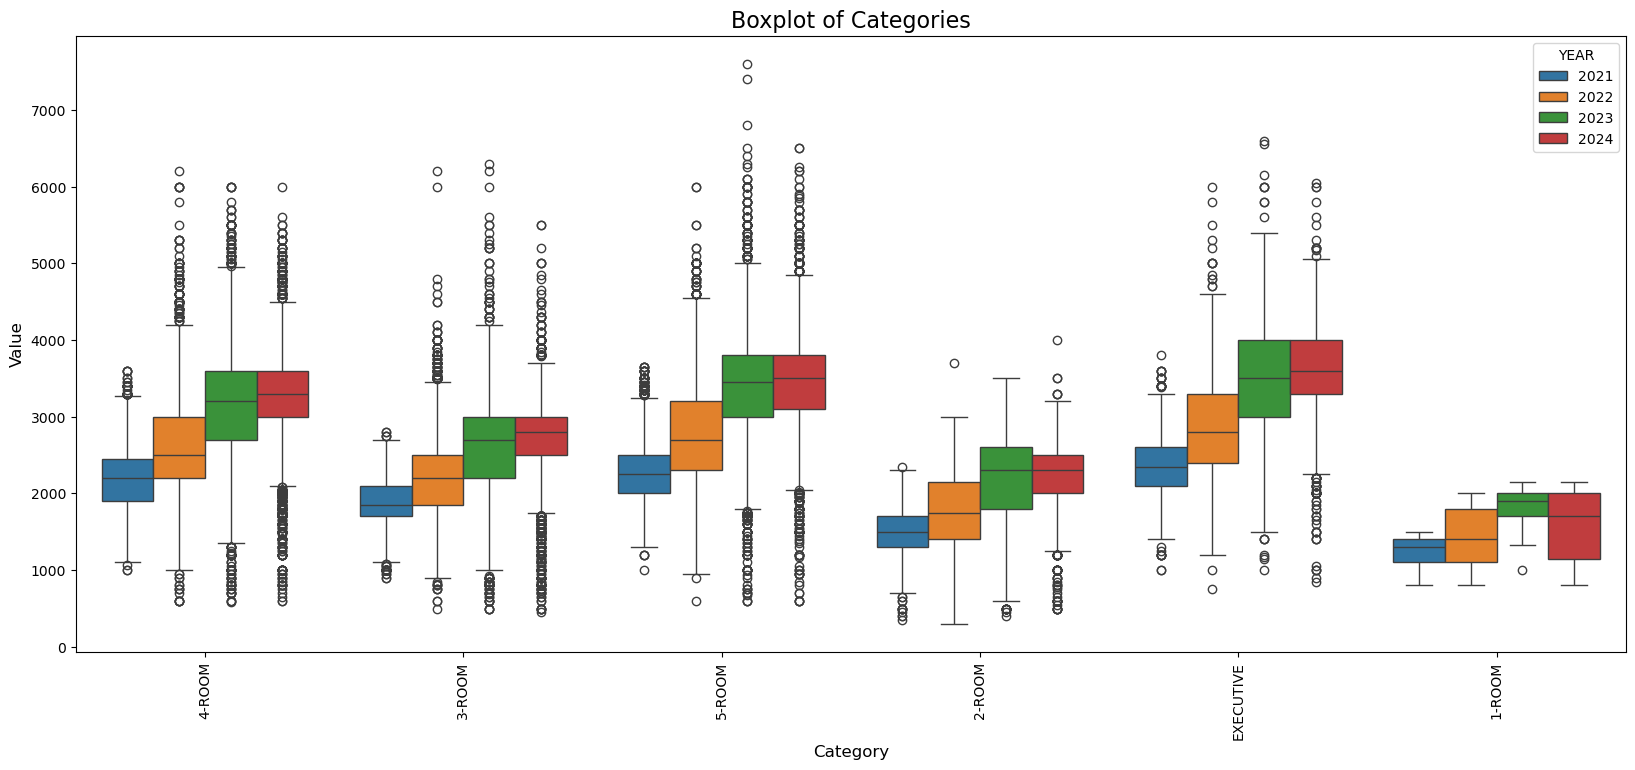

In [13]:
plt.figure(figsize=(20, 8))

sns.boxplot(y = rental_data_df['monthly_rent'], x = rental_data_df['flat_type'], hue = rental_data_df['YEAR'])
plt.title('Boxplot of Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=90)
plt.show()

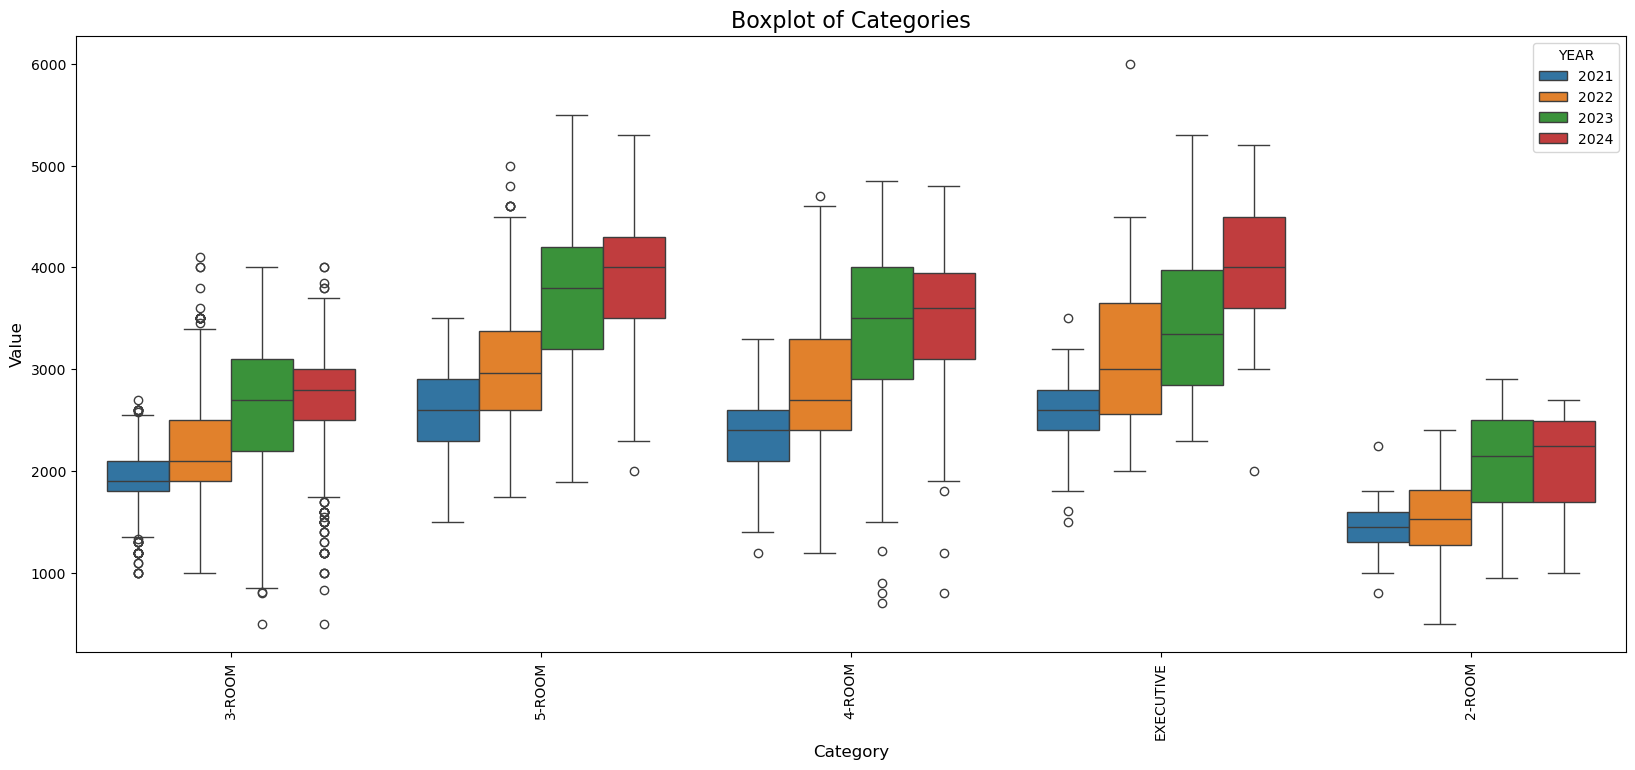

In [23]:
df = rental_data_df.loc[rental_data_df['town'] == 'TOA PAYOH']

plt.figure(figsize=(20, 8))

sns.boxplot(y = df['monthly_rent'], x = df['flat_type'], hue = df['YEAR'])
plt.title('Boxplot of Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Employment count

In [16]:
import requests
          
dataset_id = "d_473a7a55385ca4a3597bc674a79ffe67"
url = "https://data.gov.sg/api/action/datastore_search?resource_id="  + dataset_id
        
response = requests.get(url)
print(response.json())

{'help': 'https://data.gov.sg/api/3/action/help_show?name=datastore_search', 'success': True, 'result': {'resource_id': 'd_473a7a55385ca4a3597bc674a79ffe67', 'fields': [{'type': 'text', 'id': 'DataSeries'}, {'type': 'numeric', 'id': '2024Aug'}, {'type': 'numeric', 'id': '2024Jul'}, {'type': 'numeric', 'id': '2024Jun'}, {'type': 'numeric', 'id': '2024May'}, {'type': 'numeric', 'id': '2024Apr'}, {'type': 'numeric', 'id': '2024Mar'}, {'type': 'numeric', 'id': '2024Feb'}, {'type': 'numeric', 'id': '2024Jan'}, {'type': 'numeric', 'id': '2023Dec'}, {'type': 'numeric', 'id': '2023Nov'}, {'type': 'numeric', 'id': '2023Oct'}, {'type': 'numeric', 'id': '2023Sep'}, {'type': 'numeric', 'id': '2023Aug'}, {'type': 'numeric', 'id': '2023Jul'}, {'type': 'numeric', 'id': '2023Jun'}, {'type': 'numeric', 'id': '2023May'}, {'type': 'numeric', 'id': '2023Apr'}, {'type': 'numeric', 'id': '2023Mar'}, {'type': 'numeric', 'id': '2023Feb'}, {'type': 'numeric', 'id': '2023Jan'}, {'type': 'numeric', 'id': '2022De

In [17]:
records = response.json()['result']['records']
pd.DataFrame(records)

,_id,DataSeries,2024Aug,2024Jul,2024Jun,2024May,2024Apr,2024Mar,2024Feb,2024Jan,...,2016Oct,2016Sep,2016Aug,2016Jul,2016Jun,2016May,2016Apr,2016Mar,2016Feb,2016Jan
0,1,Jobseekers Assisted,44433,38583,32245,26663,21268,15333,10711,6078,...,21946,19972,18044,15717,13408,11278,8941,6702,4344,2319
1,2,Male,22725,19819,16598,13751,10986,8008,5598,3132,...,11892,10764,9768,8465,7250,6093,4770,3569,2333,1255
2,3,Female,21686,18745,15640,12905,10275,7321,5111,2945,...,10054,9208,8276,7252,6158,5185,4171,3133,2011,1064
3,4,Unknown,22,19,7,7,7,4,2,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Placements,26677,22503,18427,14777,10942,7533,4917,2039,...,12620,11415,10355,9060,8123,6692,5321,3970,2700,1470
5,6,Male,13803,11684,9588,7803,5849,4064,2701,1141,...,7011,6318,5759,5053,4540,3784,3009,2263,1558,832
6,7,Female,12870,10816,8836,6972,5091,3467,2216,898,...,5609,5097,4596,4007,3583,2908,2312,1707,1142,638
7,8,Unknown,4,3,3,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
for key, value in response.json()['result'].items():
    print(key)

resource_id
fields
records
_links
total


In [19]:
response.json()

{'help': 'https://data.gov.sg/api/3/action/help_show?name=datastore_search',
 'success': True,
 'result': {'resource_id': 'd_473a7a55385ca4a3597bc674a79ffe67',
  'fields': [{'type': 'text', 'id': 'DataSeries'},
   {'type': 'numeric', 'id': '2024Aug'},
   {'type': 'numeric', 'id': '2024Jul'},
   {'type': 'numeric', 'id': '2024Jun'},
   {'type': 'numeric', 'id': '2024May'},
   {'type': 'numeric', 'id': '2024Apr'},
   {'type': 'numeric', 'id': '2024Mar'},
   {'type': 'numeric', 'id': '2024Feb'},
   {'type': 'numeric', 'id': '2024Jan'},
   {'type': 'numeric', 'id': '2023Dec'},
   {'type': 'numeric', 'id': '2023Nov'},
   {'type': 'numeric', 'id': '2023Oct'},
   {'type': 'numeric', 'id': '2023Sep'},
   {'type': 'numeric', 'id': '2023Aug'},
   {'type': 'numeric', 'id': '2023Jul'},
   {'type': 'numeric', 'id': '2023Jun'},
   {'type': 'numeric', 'id': '2023May'},
   {'type': 'numeric', 'id': '2023Apr'},
   {'type': 'numeric', 'id': '2023Mar'},
   {'type': 'numeric', 'id': '2023Feb'},
   {'type'

# Address to coordinates

In [88]:
# https://www.onemap.gov.sg/apidocs/search

start = time.time()
rental_data_df['postal_code'] = None
rental_data_df['latitude'] = None
rental_data_df['longitude'] = None
for address in rental_data_df['address'].unique():
    url = f"https://www.onemap.gov.sg/api/common/elastic/search?searchVal={address}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
    headers = {"Authorization": "Bearer **********************"}
    response = requests.get(url, headers=headers)
    parsed_data = json.loads(response.text)
    rental_data_df.loc[rental_data_df['address'] == address, 'postal_code'] = parsed_data['results'][0]['POSTAL']
    rental_data_df.loc[rental_data_df['address'] == address, 'latitude'] = parsed_data['results'][0]['LATITUDE']
    rental_data_df.loc[rental_data_df['address'] == address, 'longitude'] = parsed_data['results'][0]['LONGITUDE']
start -  time.time()

ReadTimeout: HTTPSConnectionPool(host='www.onemap.gov.sg', port=443): Read timed out. (read timeout=None)

In [108]:
rental_data_df.loc[rental_data_df['postal_code'].isna(), 'address']

Series([], Name: address, dtype: object)

# Walking distance and time between mrt and distance

In [3]:
load_dotenv()

api_key = os.getenv('API_KEY_26122024')

if api_key:
    print("KEY loaded successfully.")
else:
    print("KEY not found.")


In [12]:
rental_data_df = pd.read_csv('inputs/rental_with_coordinates.csv')
unique_addresses_df = rental_data_df.drop_duplicates(subset='address', keep='first')[['address', 'postal_code', 'latitude', 'longitude']]

In [13]:
station_df = pd.read_csv('inputs/stations_with_coordinates.csv')
station_df.columns = 'station_' + station_df.columns

In [14]:
station_df

,station_station_code,station_station_name,station_postal_code,station_latitude,station_longitude
0,EW1,PASIR RIS MRT STATION (EW1),519634,1.373043,103.949285
1,EW2,TAMPINES MRT STATION (EW2),529538,1.353302,103.945145
2,EW3,SIMEI MRT STATION (EW3),529888,1.343197,103.953377
3,EW4,TANAH MERAH MRT STATION (EW4),467356,1.327187,103.946349
4,EW5,BEDOK MRT STATION (EW5),467347,1.323980,103.929984
...,...,...,...,...,...
206,PW3,PUNGGOL POINT LRT STATION (PW3),828644,1.416849,103.906651
207,PW4,SAMUDERA LRT STATION (PW4),828645,1.415902,103.902156
208,PW5,NIBONG LRT STATION (PW5),828862,1.411854,103.900339
209,PW6,SUMANG LRT STATION (PW6),828863,1.408452,103.898558


In [39]:
time_distance_df = unique_addresses_df.merge(station_df, how = 'cross')
time_distance_df['walking_time_s'] = None
time_distance_df['walking_distance_m'] = None
time_distance_df.shape

(2013362, 11)

In [40]:
time_distance_df.loc[time_distance_df['postal_code'] == 'NIL', 'address'].unique()

array(['215 CHOA CHU KANG CTRL'], dtype=object)

In [41]:
time_distance_df.loc[time_distance_df['postal_code'] == 'NIL', 'address'].unique()

array(['215 CHOA CHU KANG CTRL'], dtype=object)

In [42]:
time_distance_df.loc[time_distance_df['address'] == '213 CHOA CHU KANG CTRL']

,address,postal_code,latitude,longitude,station_station_code,station_station_name,station_postal_code,station_latitude,station_longitude,walking_time_s,walking_distance_m
619918,213 CHOA CHU KANG CTRL,680213,1.382173,103.747212,EW1,PASIR RIS MRT STATION (EW1),519634,1.373043,103.949285,None,None
619919,213 CHOA CHU KANG CTRL,680213,1.382173,103.747212,EW2,TAMPINES MRT STATION (EW2),529538,1.353302,103.945145,None,None
619920,213 CHOA CHU KANG CTRL,680213,1.382173,103.747212,EW3,SIMEI MRT STATION (EW3),529888,1.343197,103.953377,None,None
619921,213 CHOA CHU KANG CTRL,680213,1.382173,103.747212,EW4,TANAH MERAH MRT STATION (EW4),467356,1.327187,103.946349,None,None
619922,213 CHOA CHU KANG CTRL,680213,1.382173,103.747212,EW5,BEDOK MRT STATION (EW5),467347,1.323980,103.929984,None,None
...,...,...,...,...,...,...,...,...,...,...,...
620124,213 CHOA CHU KANG CTRL,680213,1.382173,103.747212,PW3,PUNGGOL POINT LRT STATION (PW3),828644,1.416849,103.906651,None,None
620125,213 CHOA CHU KANG CTRL,680213,1.382173,103.747212,PW4,SAMUDERA LRT STATION (PW4),828645,1.415902,103.902156,None,None
620126,213 CHOA CHU KANG CTRL,680213,1.382173,103.747212,PW5,NIBONG LRT STATION (PW5),828862,1.411854,103.900339,None,None
620127,213 CHOA CHU KANG CTRL,680213,1.382173,103.747212,PW6,SUMANG LRT STATION (PW6),828863,1.408452,103.898558,None,None


In [43]:
time_distance_df.loc[time_distance_df['address'] == '215 CHOA CHU KANG CTRL', 'postal_code'] = 680215

In [46]:
time_distance_df['station_postal_code'] = time_distance_df['station_postal_code'].astype(int)
time_distance_df['postal_code'] = time_distance_df['postal_code'].astype(int)
time_distance_df['postal_code_diff'] = abs(time_distance_df['station_postal_code'] - time_distance_df['postal_code'])
time_distance_df = time_distance_df.loc[time_distance_df['postal_code_diff']< 10000]
time_distance_df = time_distance_df.reset_index(drop = True)

In [47]:
start = time.time()

for row in range(len(time_distance_df)):
    start_latitude = float(time_distance_df.loc[row, 'latitude'])
    start_longitude = float(time_distance_df.loc[row, 'longitude'])    
    end_latitude = float(time_distance_df.loc[row, 'station_latitude'])
    end_longitude = float(time_distance_df.loc[row, 'station_longitude'])   

    url = f"https://www.onemap.gov.sg/api/public/routingsvc/route?start={start_latitude}%2C{start_longitude}&end={end_latitude}%2C{end_longitude}&routeType=walk"
    headers = {"Authorization": api_key}
    response = requests.request("GET", url, headers=headers)
    
    parsed_data = json.loads(response.text)    
    time_distance_df.loc[row, 'walking_time_s'] = parsed_data['route_summary']['total_time'] 
    time_distance_df.loc[row, 'walking_distance_m'] = parsed_data['route_summary']['total_distance'] 

    if row%100 == 0:
        print(row, time.time() - start)
    if row%1000 == 0:
        time.sleep(60)

0 0.5859618186950684
100 59.80366277694702
200 119.71950674057007
300 179.0064721107483
400 239.29404258728027
500 298.0665509700775
600 357.6086468696594
700 416.19181990623474
800 473.8015067577362
900 531.0383813381195
1000 592.1496889591217
1100 653.7465376853943
1200 712.5676078796387
1300 770.8104629516602
1400 831.3770406246185
1500 891.1645641326904
1600 953.4624588489532
1700 1015.7218413352966
1800 1073.3078207969666
1900 1135.3971276283264
2000 1193.3464722633362
2100 1254.7818057537079
2200 1310.5469641685486
2300 1376.3209156990051
2400 1442.5378017425537
2500 1513.4502129554749
2600 1569.9829576015472
2700 1627.5734753608704
2800 1679.9438638687134
2900 1738.3899405002594
3000 1798.9494533538818
3100 1866.0280148983002
3200 1930.3035800457
3300 1994.9226467609406
3400 2057.8355445861816
3500 2114.788779735565
3600 2181.2554998397827
3700 2239.6913866996765
3800 2298.379915714264
3900 2361.2410480976105
4000 2420.7056045532227
4100 2482.472410917282
4200 2543.6561698913574

ReadTimeout: HTTPSConnectionPool(host='www.onemap.gov.sg', port=443): Read timed out. (read timeout=None)

In [ ]:
time_distance_df.to_csv('inputs/travelling_distance.csv')